autoencoders can be used to create and generate the output from the image to a certain representation

that representation is the squeezed or encoded version of the input image

we can use encoder to generate some pattern in the image
that certain pattern will have very less features as compared to the whole lot of features as in the original image provided

the squeezed image is better to be used computationally and can be used to store the value of representation easily

in this notebook I am trying to apply the autoencoder to an image that is 3dimensional and want to see how the output comes
that would be computationally very heavy but have to try that out to see what it does on the colored image


also in the later stage I can try that using the fashion mnist dataset to generate the dresses after encoding and decoding 

also I can try to separate the encoder network and decoder network - can be used to work on that image later

## Autoencoder
* same nodes for input and output
* hidden later is symmetric about the center
* number of nodes in hidden layer decrease and increase


In [1]:
import tensorflow as tf
devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(devices[0], True)

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K

import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

n_pixels = np.prod(x_train.shape[1:])
x_train = x_train.reshape(x_train.shape[0],n_pixels)
x_test = x_test.reshape(x_test.shape[0],n_pixels)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

In [5]:
model = Sequential()
# 784 
model.add(Dense(128, activation='relu', input_shape=(784,) ))
model.add(Dense( 32, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, x_train, epochs=3, validation_data=(x_test, x_test))

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1381 - accuracy: 0.0122 - val_loss: 0.1025 - val_accuracy: 0.0111
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0994 - accuracy: 0.0134 - val_loss: 0.0945 - val_accuracy: 0.0131
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0940 - accuracy: 0.0133 - val_loss: 0.0911 - val_accuracy: 0.0139


In [7]:
model.save('one_more_mnist.h5')

In [11]:
def test_restoration(model):
    
    decoded_imgs = model.predict(x_test)
    get_3rd_layer_op = K.function([model.layers[0].input], [model.layers[1].output])
    
    for i in range(1,4):
        print('original')
        plt.imshow(x_test[i].reshape(28,28))
        plt.show()
        
        print('reconstructed')
        plt.imshow(x_test[i].reshape(28,28))
        plt.show()
        
        print('compressed')
        comp = get_3rd_layer_op([x_test[i:i+1]])[0][0]
        plt.imshow(comp.reshape(8,4))
        plt.show()

original


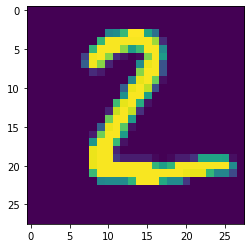

reconstructed


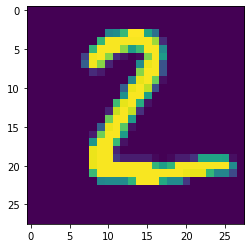

compressed


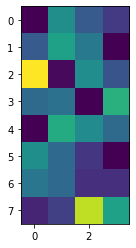

original


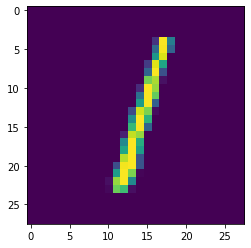

reconstructed


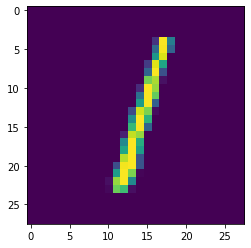

compressed


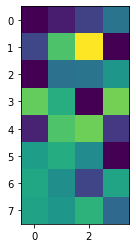

original


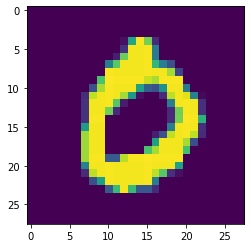

reconstructed


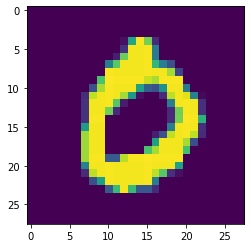

compressed


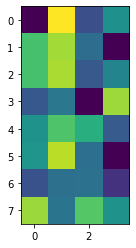

In [12]:
test_restoration(model)

# Now lets work with CIFAR10 dataset


In [13]:
from tensorflow.keras.datasets import cifar10

In [76]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

In [97]:
# since the 3 channel matrix was not giving correct image feature and was mixing up the channels
# so I shifted it and converted to grayscale by removing one channel from image 
# #images, height, width, channel
# TODO: merge all 3 colors to form one single channel of all
# TODO: train the encoder model with 3 channels also 


X_train, X_test = X_train[:,:,:,0], X_test[:,:,:,0]

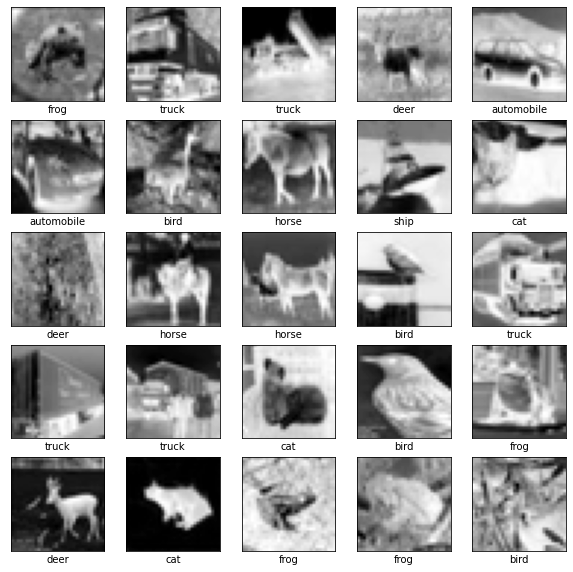

In [78]:
# just to see what we have got till now

class_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse',
             'ship','truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.xlabel(class_name[y_train[i][0]])
plt.show()

In [79]:
len(X_train)
len(X_train[0])

32

In [80]:
X_train.shape

(50000, 32, 32)

In [81]:
# normalizing the image as the neural network works best with 0-1 values
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

n_pixels = np.prod(X_train.shape[1:])
X_train = X_train.reshape(X_train.shape[0],n_pixels)
X_test = X_test.reshape(X_test.shape[0],n_pixels)

In [82]:
X_train.shape

(50000, 1024)

In [87]:
model = Sequential()
# 1024 for single channel - 3072 for 3 channels
# input equal to output - and internal hidden layers can be the same
model.add(Dense(128, activation='relu', input_shape=(1024,) ))
model.add(Dense( 32, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1024, activation='sigmoid'))

In [88]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, X_train, epochs=3, validation_data=(X_test, X_test))

Epoch 1/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6118 - accuracy: 0.0063 - val_loss: 0.5994 - val_accuracy: 0.0067
Epoch 2/3
1563/1563 [==============================] - 4s 3ms/step - loss: 0.5979 - accuracy: 0.0091 - val_loss: 0.5978 - val_accuracy: 0.0076
Epoch 3/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5948 - accuracy: 0.0094 - val_loss: 0.5956 - val_accuracy: 0.0097


In [89]:
model.save('cifar_gray_autoenc.h5')

In [94]:
def test_restoration(model):
    
    decoded_imgs = model.predict(X_test)
    get_3rd_layer_op = K.function([model.layers[0].input], [model.layers[1].output])
    
    for i in range(0,2):
        print('original')
        plt.imshow(X_test[i].reshape(32,32,1))
        plt.show()
        
        print('reconstructed')
        plt.imshow(X_test[i].reshape(32,32,1))
        plt.show()
        
        print('compressed')
        comp = get_3rd_layer_op([X_test[i:i+1]])[0][0]
        plt.imshow(comp.reshape(8,4))
        plt.show()

original


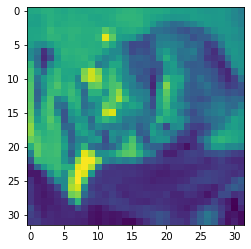

reconstructed


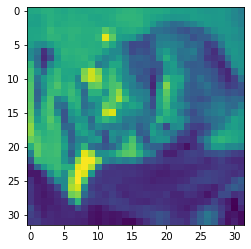

compressed


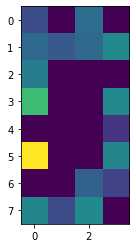

original


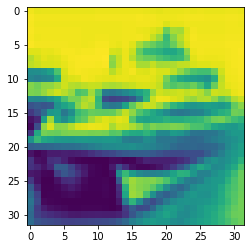

reconstructed


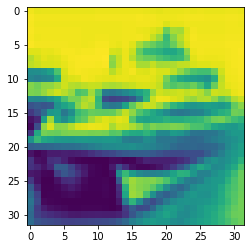

compressed


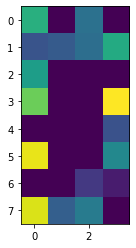

In [95]:
test_restoration(model)

original


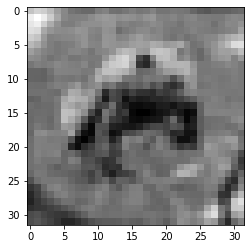

In [93]:
print('original')
plt.imshow(X_train[0].reshape(32,32,1),cmap=plt.cm.binary)
plt.show()

In [56]:
X_train[0].reshape(32,32,3).shape

(32, 32, 3)

# Conclusion
this model is able to generalize and generate the images back from squeezed version to whole image without distortion
3 channel was disturbed due to issues with numpy reshape function - that can be solved but the first version is ready
we can improve it more as per the time allowance